In [63]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [65]:
patient = pd.read_csv("C:/Users/hp/Documents/indian_liver_patient.csv")
patient

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [67]:
patient.value_counts('Gender')

Gender
Male      441
Female    142
Name: count, dtype: int64

In [69]:
patient.replace({'Gender':{'Male':0, 'Female':1}}, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_1468\3460246739.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  patient.replace({'Gender':{'Male':0, 'Female':1}}, inplace=True)


In [71]:
patient

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,0,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,0,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,0,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,0,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [73]:
patient.value_counts('Dataset')

Dataset
1    416
2    167
Name: count, dtype: int64

<Axes: >

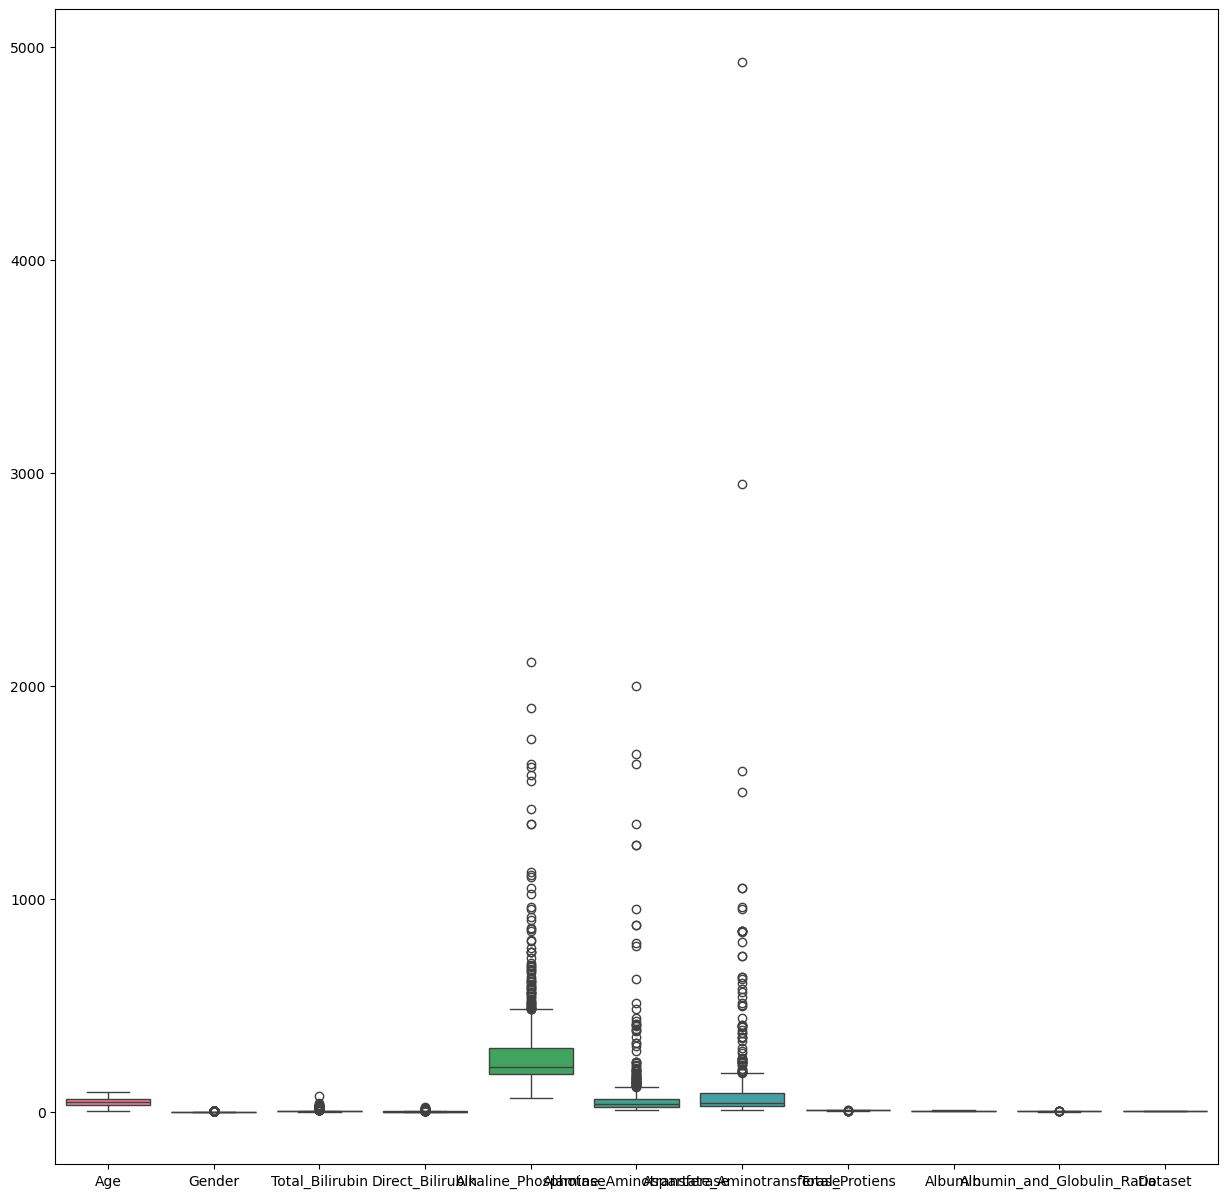

In [75]:
fig,ax = plt.subplots(figsize=(15,15))
sns.boxplot(data=patient,ax=ax)

<Axes: xlabel='Dataset'>

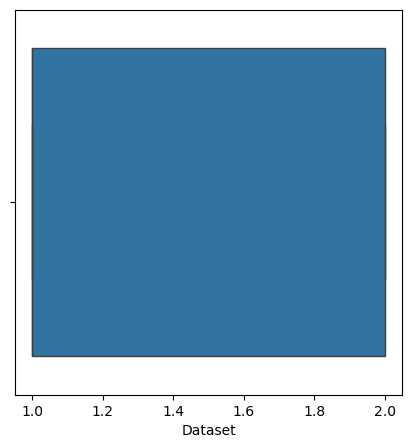

In [76]:
fig,ax = plt.subplots(figsize=(5,5))
sns.boxplot(x=patient['Dataset'],ax=ax)

<Axes: xlabel='Albumin'>

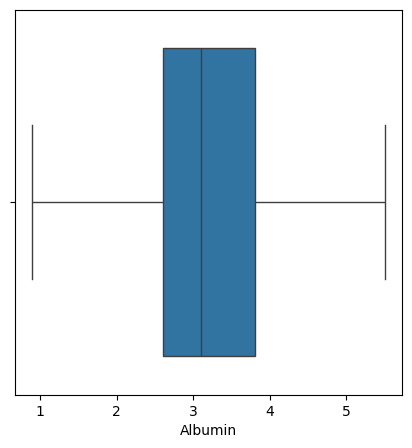

In [77]:
fig,ax = plt.subplots(figsize=(5,5))
sns.boxplot(x=patient['Albumin'],ax=ax)

<Axes: xlabel='Gender'>

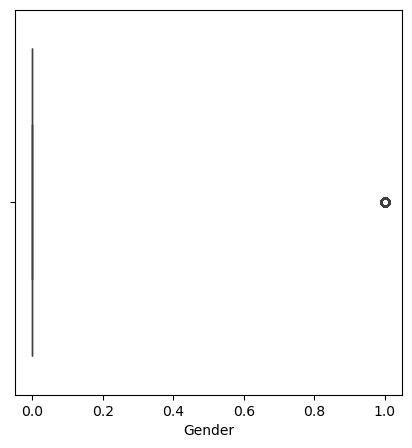

In [78]:
fig,ax = plt.subplots(figsize=(5,5))
sns.boxplot(x=patient['Gender'],ax=ax)

<Axes: xlabel='Total_Bilirubin'>

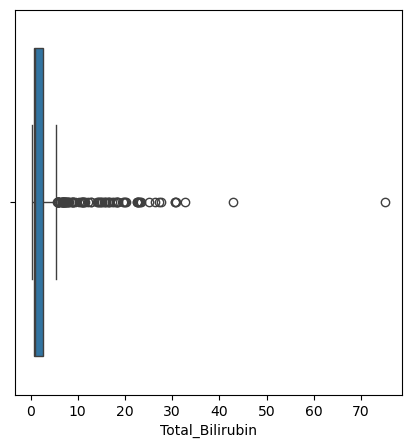

In [83]:
fig,ax = plt.subplots(figsize=(5,5))
sns.boxplot(x=patient['Total_Bilirubin'],ax=ax)

In [87]:
Q1 = patient['Total_Bilirubin'].quantile(0.25)
Q3 = patient['Total_Bilirubin'].quantile(0.75)

#calculate IQR
IQR = Q3 - Q1

#determine the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Filter out the outliers
newdata= patient[(patient['Total_Bilirubin']>= lower_bound)&(patient['Total_Bilirubin'] <= upper_bound)]

<Axes: xlabel='Total_Bilirubin'>

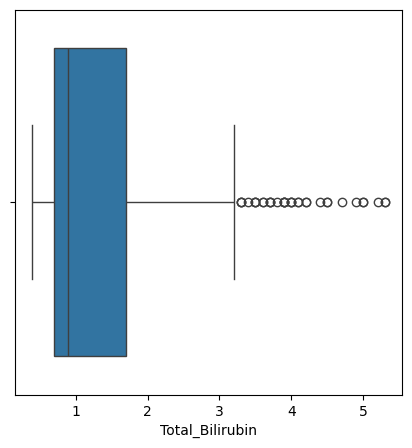

In [91]:
fig,ax = plt.subplots(figsize=(5,5))
sns.boxplot(x=newdata['Total_Bilirubin'],ax=ax)

In [93]:
Q1 = patient['Direct_Bilirubin'].quantile(0.25)
Q3 = patient['Direct_Bilirubin'].quantile(0.75)

#calculate IQR
IQR = Q3 - Q1

#determine the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Filter out the outliers
newdata= patient[(patient['Direct_Bilirubin']>= lower_bound)&(patient['Direct_Bilirubin'] <= upper_bound)]

<Axes: xlabel='Direct_Bilirubin'>

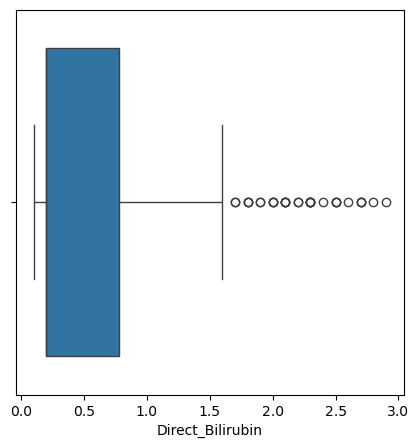

In [95]:
fig,ax = plt.subplots(figsize=(5,5))
sns.boxplot(x=newdata['Direct_Bilirubin'],ax=ax)

In [97]:
Q1 = patient['Alkaline_Phosphotase'].quantile(0.25)
Q3 = patient['Alkaline_Phosphotase'].quantile(0.75)

#calculate IQR
IQR = Q3 - Q1

#determine the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Filter out the outliers
newdata= patient[(patient['Alkaline_Phosphotase']>= lower_bound)&(patient['Alkaline_Phosphotase'] <= upper_bound)]

<Axes: xlabel='Alkaline_Phosphotase'>

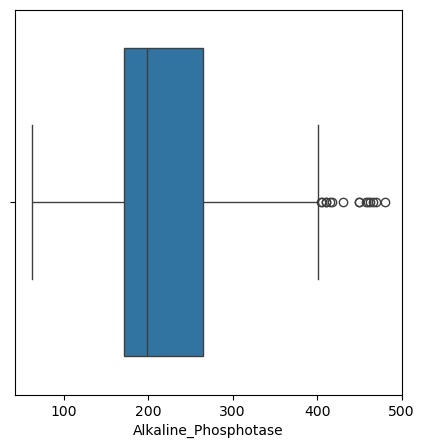

In [99]:
fig,ax = plt.subplots(figsize=(5,5))
sns.boxplot(x=newdata['Alkaline_Phosphotase'],ax=ax)

In [101]:
Q1 = patient['Alamine_Aminotransferase'].quantile(0.25)
Q3 = patient['Alamine_Aminotransferase'].quantile(0.75)

#calculate IQR
IQR = Q3 - Q1

#determine the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Filter out the outliers
newdata= patient[(patient['Alamine_Aminotransferase']>= lower_bound)&(patient['Alamine_Aminotransferase'] <= upper_bound)]

<Axes: xlabel='Alamine_Aminotransferase'>

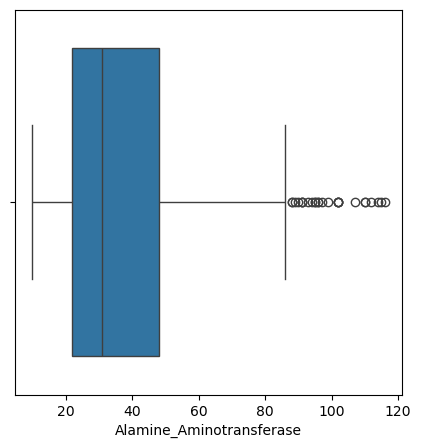

In [103]:
fig,ax = plt.subplots(figsize=(5,5))
sns.boxplot(x=newdata['Alamine_Aminotransferase'],ax=ax)

In [105]:
Q1 = patient['Aspartate_Aminotransferase'].quantile(0.25)
Q3 = patient['Aspartate_Aminotransferase'].quantile(0.75)

#calculate IQR
IQR = Q3 - Q1

#determine the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Filter out the outliers
newdata= patient[(patient['Aspartate_Aminotransferase']>= lower_bound)&(patient['Aspartate_Aminotransferase'] <= upper_bound)]

<Axes: xlabel='Aspartate_Aminotransferase'>

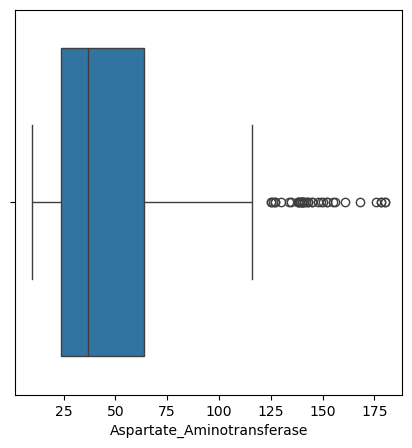

In [107]:
fig,ax = plt.subplots(figsize=(5,5))
sns.boxplot(x=newdata['Aspartate_Aminotransferase'],ax=ax)

In [109]:
Q1 = patient['Total_Protiens'].quantile(0.25)
Q3 = patient['Total_Protiens'].quantile(0.75)

#calculate IQR
IQR = Q3 - Q1

#determine the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Filter out the outliers
newdata= patient[(patient['Total_Protiens']>= lower_bound)&(patient['Total_Protiens'] <= upper_bound)]

<Axes: xlabel='Total_Protiens'>

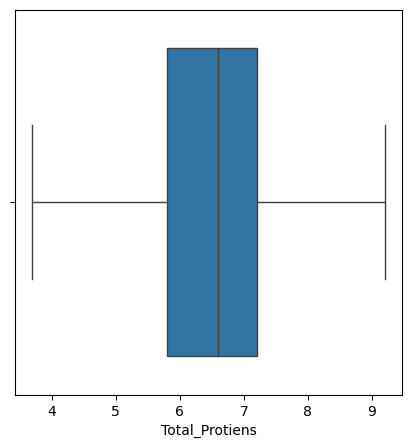

In [111]:
fig,ax = plt.subplots(figsize=(5,5))
sns.boxplot(x=newdata['Total_Protiens'],ax=ax)

In [113]:
Q1 = patient['Albumin_and_Globulin_Ratio'].quantile(0.25)
Q3 = patient['Albumin_and_Globulin_Ratio'].quantile(0.75)

#calculate IQR
IQR = Q3 - Q1

#determine the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Filter out the outliers
newdata= patient[(patient['Albumin_and_Globulin_Ratio']>= lower_bound)&(patient['Albumin_and_Globulin_Ratio'] <= upper_bound)]

<Axes: xlabel='Albumin_and_Globulin_Ratio'>

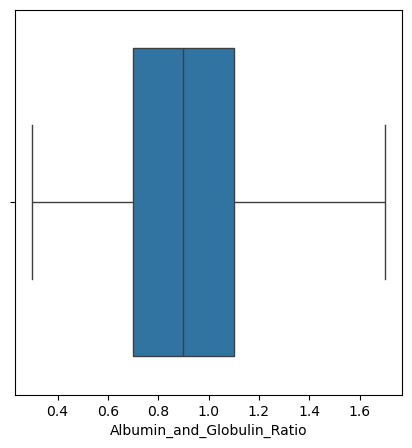

In [115]:
fig,ax = plt.subplots(figsize=(5,5))
sns.boxplot(x=newdata['Albumin_and_Globulin_Ratio'],ax=ax)

In [117]:
correlation = newdata.corr()

In [119]:
correlation

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,-0.050757,0.018618,0.017000,0.082989,-0.088388,-0.020885,-0.177115,-0.260584,-0.235317,-0.139626
Gender,-0.050757,1.000000,-0.081004,-0.090929,0.030435,-0.080850,-0.077754,0.084262,0.081836,0.005432,0.084281
Total_Bilirubin,0.018618,-0.081004,1.000000,0.870421,0.204614,0.218243,0.240559,-0.012361,-0.221593,-0.296019,-0.214926
Direct_Bilirubin,0.017000,-0.090929,0.870421,1.000000,0.235322,0.241517,0.263218,-0.005095,-0.230105,-0.311746,-0.241575
Alkaline_Phosphotase,0.082989,0.030435,0.204614,0.235322,1.000000,0.123763,0.166806,-0.033310,-0.162691,-0.250640,-0.181529
Alamine_Aminotransferase,-0.088388,-0.080850,0.218243,0.241517,0.123763,1.000000,0.792078,-0.042359,-0.026702,0.012581,-0.164230
Aspartate_Aminotransferase,-0.020885,-0.077754,0.240559,0.263218,0.166806,0.792078,1.000000,-0.024646,-0.083863,-0.076558,-0.153216
Total_Protiens,-0.177115,0.084262,-0.012361,-0.005095,-0.033310,-0.042359,-0.024646,1.000000,0.792019,0.258657,0.038912
Albumin,-0.260584,0.081836,-0.221593,-0.230105,-0.162691,-0.026702,-0.083863,0.792019,1.000000,0.767529,0.154842
Albumin_and_Globulin_Ratio,-0.235317,0.005432,-0.296019,-0.311746,-0.250640,0.012581,-0.076558,0.258657,0.767529,1.000000,0.181659


<Axes: >

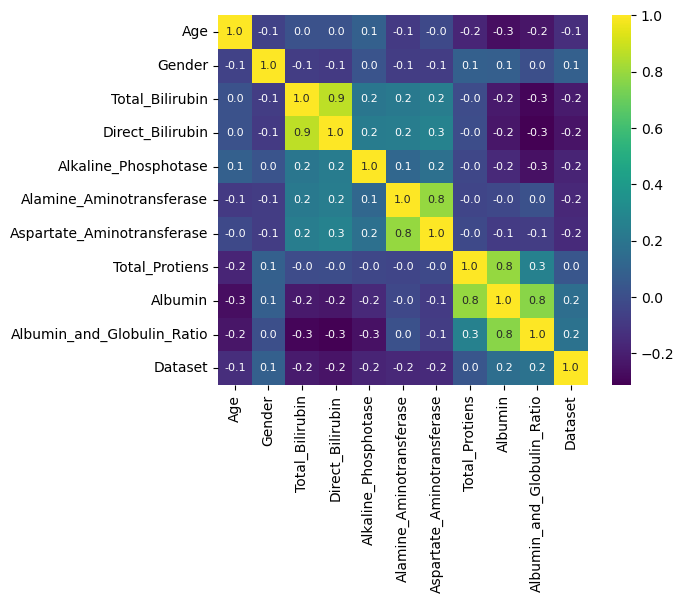

In [121]:
sns.heatmap(correlation, cbar=True, annot=True, square=True, annot_kws={'size':8}, cmap='viridis', fmt='.1f')

In [126]:
x = newdata.drop('Dataset', axis=1)

In [128]:
x

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40
...,...,...,...,...,...,...,...,...,...,...
578,60,0,0.5,0.1,500,20,34,5.9,1.6,0.37
579,40,0,0.6,0.1,98,35,31,6.0,3.2,1.10
580,52,0,0.8,0.2,245,48,49,6.4,3.2,1.00
581,31,0,1.3,0.5,184,29,32,6.8,3.4,1.00


In [130]:
y= newdata['Dataset']

In [132]:
y

0      1
1      1
2      1
3      1
4      1
      ..
578    2
579    1
580    1
581    1
582    2
Name: Dataset, Length: 569, dtype: int64

In [134]:
from imblearn.over_sampling import SMOTE

In [136]:
smote = SMOTE()

In [138]:
x_resampled, y_resampled = smote.fit_resample(x,y)

In [140]:
x_train, x_test, y_train, y_test= train_test_split(x_resampled, y_resampled, test_size=0.3, random_state=42)

In [144]:
x_resampled.shape, x_train.shape, x_test.shape, y_resampled.shape, y_train.shape, y_test.shape

((816, 10), (571, 10), (245, 10), (816,), (571,), (245,))

In [147]:
model= RandomForestClassifier()

In [149]:
model.fit(x_train, y_train)

RandomForestClassifier()

In [153]:
train_data_predict = model.predict(x_train)
train_data_accuracy = accuracy_score(train_data_predict, y_train)
print('Accuracy of predicted data', train_data_accuracy)

Accuracy of predicted data 1.0


In [155]:
test_data_predict = model.predict(x_test)
test_data_accuracy = accuracy_score(test_data_predict, y_test)
print('Accuracy of predicted data', test_data_accuracy)

Accuracy of predicted data 0.7591836734693878


In [157]:
cm = confusion_matrix(test_data_predict, y_test)

In [159]:
cm

array([[87, 20],
       [39, 99]], dtype=int64)

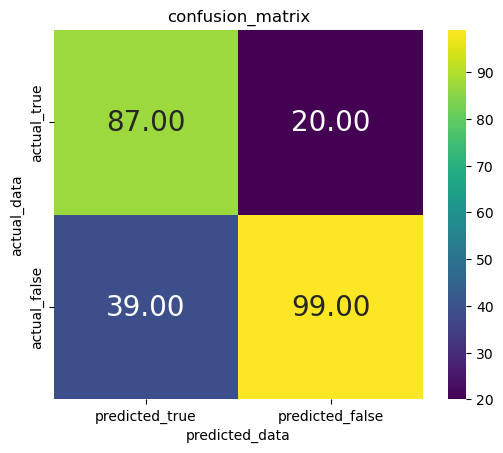

In [161]:
sns.heatmap(cm,annot= True, annot_kws= {'size':20}, fmt = '.2f', cmap = 'viridis', square = True,
            xticklabels = ['predicted_true','predicted_false'],
            yticklabels = ['actual_true','actual_false'])
plt.xlabel('predicted_data')
plt.ylabel('actual_data')
plt.title('confusion_matrix')
plt.show()

In [163]:
print(classification_report(test_data_predict, y_test))

              precision    recall  f1-score   support

           1       0.69      0.81      0.75       107
           2       0.83      0.72      0.77       138

    accuracy                           0.76       245
   macro avg       0.76      0.77      0.76       245
weighted avg       0.77      0.76      0.76       245



In [167]:
newdata.to_csv('cleaned_data_patient.csv', index =False)

In [175]:
new_data = (57,	0,	1.0,	0.3,	187,	19,	23,	5.2,	2.9,	1.20)
new_data_as_np = np.asarray(new_data)
new_data_reshaped = new_data_as_np.reshape(1,-1)
prediction = model.predict(new_data_reshaped)
if prediction[0]==1:
    print('1')
else:
    print('2')

2


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [173]:
newdata.head(40)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,0,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,1,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,1,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,0,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,0,0.7,0.2,290,53,58,6.8,3.4,1.00,1
